In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
hw = pd.read_csv('data.csv')
hw['bmi'] = hw.Weight/(hw.Height**2)

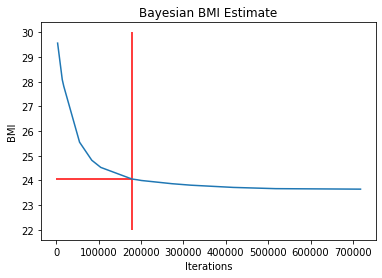

In [2]:
weight = [63.88,60.67,60.1,55.21,53.63,53,52,51.92,51.87,51.8,51.58,51.45,51.27,51.15,51.13,51.11]
bmi = [29.56,28.08,27.81,25.55,24.82,24.53,24.06,24.03,24,23.97,23.87,23.81,23.72,23.67,23.66,23.65]
iterations = [3401,14401,18001,55201,84001,105201,178701,190901,201101,218001,273401,318001,418001,518001,618001,718001]
plt.title("Bayesian BMI Estimate")
plt.ylabel("BMI")
plt.xlabel("Iterations")
plt.vlines(x=178701,ymin=22,ymax=30, color='red')
plt.hlines(y=24.06, xmin=0,xmax=178701, color='red')
plt.plot(iterations, bmi)

,Height,Weight,bmi
0,1.47,52.21,24.161229
1,1.50,53.12,23.608889
2,1.52,54.48,23.580332
3,1.55,55.84,23.242456
4,1.57,57.20,23.205810
5,1.60,58.57,22.878906
6,1.63,59.93,22.556363
7,1.65,61.29,22.512397
8,1.68,63.11,22.360402
9,1.70,64.47,22.307958


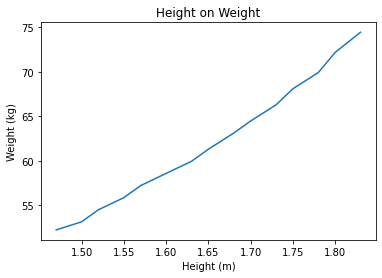

In [3]:
plt.title("Height on Weight")
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.plot(hw.Height,hw.Weight)
hw

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


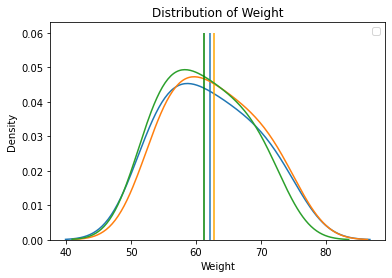

In [4]:
import seaborn as sns
plt.title('Distribution of Weight')
#plt.xticks([1.3,1.4,1.5,1.6,1.7,1.8,1.9,2])
plt.legend(
)
sns.kdeplot(hw['Weight'])
plt.vlines(x=np.mean(hw.Weight), ymin=0, ymax=.06)
sns.kdeplot(hw['Weight'][1:])
plt.vlines(x=np.mean(hw.Weight[1:]), ymin=0, ymax=.06, color='orange')
sns.kdeplot(hw['Weight'][:-1])
plt.vlines(x=np.mean(hw.Weight[:-1]), ymin=0, ymax=.06, color='green')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


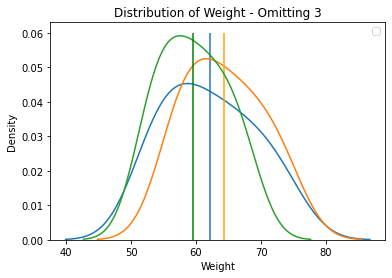

In [5]:
plt.title('Distribution of Weight - Omitting 3')
#plt.xticks([1.3,1.4,1.5,1.6,1.7,1.8,1.9,2])
plt.legend(
)
sns.kdeplot(hw['Weight'])
plt.vlines(x=np.mean(hw.Weight), ymin=0, ymax=.06)
sns.kdeplot(hw['Weight'][3:])
plt.vlines(x=np.mean(hw.Weight[3:]), ymin=0, ymax=.06, color='orange')
sns.kdeplot(hw['Weight'][:-3])
plt.vlines(x=np.mean(hw.Weight[:-3]), ymin=0, ymax=.06, color='green')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Distribution of Weight - Omitting '}, xlabel='Weight', ylabel='Density'>

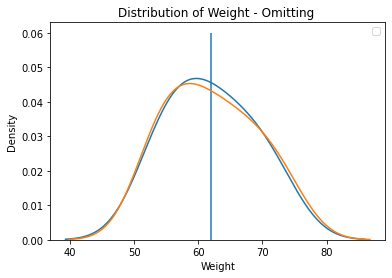

In [6]:
kw = hw.drop([0,2,4,6,8,10,12,14])
plt.title('Distribution of Weight - Omitting ')
#plt.xticks([1.3,1.4,1.5,1.6,1.7,1.8,1.9,2])
plt.legend(
)
sns.kdeplot(kw['Weight'])
plt.vlines(x=np.mean(kw.Weight), ymin=0, ymax=.06)
sns.kdeplot(hw.Weight)

In [16]:
lmhw = hw.copy()
hmhw = hw.copy()
lmhw.Weight[:3] = np.mean(lmhw.Weight[3:])
hmhw.Weight[-3:] = np.mean(hmhw.Weight[:-3])

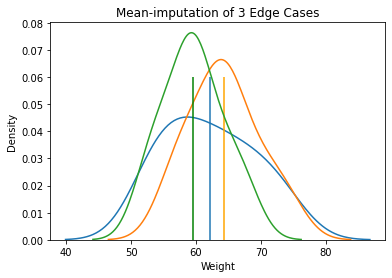

In [18]:

plt.title("Mean-imputation of 3 Edge Cases")
sns.kdeplot(hw.Weight)
plt.vlines(x=np.mean(hw.Weight), ymin=0, ymax=.06)
sns.kdeplot(lmhw.Weight)
plt.vlines(x=np.mean(lmhw.Weight), ymin=0, ymax=.06, color='orange')
sns.kdeplot(hmhw.Weight)
plt.vlines(x=np.mean(hmhw.Weight), ymin=0, ymax=.06, color='green')

In [ ]:
\begin{marginfigure}%
  \includegraphics[width=\linewidth]{hwmean.png}
  \caption{Distributions of the data using mean-imputation of missing data for the least and greatest weights.}
  \label{fig:marginfig}
\end{marginfigure}

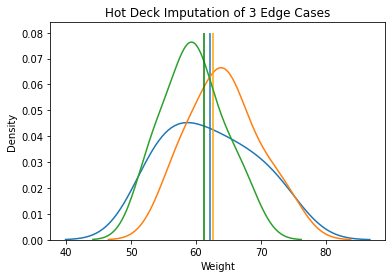

In [33]:
#hot deck
hhdhw = hw.copy()
lhdhw = hw.copy()
hhdhw.Weight[:3] = hw.Weight[3]
lhdhw.Weight[-3:] = hw.Weight[11]


plt.title("Hot Deck Imputation of 3 Edge Cases")
sns.kdeplot(hw.Weight)
plt.vlines(x=np.mean(hw.Weight), ymin=0, ymax=.08)
sns.kdeplot(lmhw.Weight)
plt.vlines(x=np.mean(hhdhw.Weight), ymin=0, ymax=.08, color='orange')
sns.kdeplot(hmhw.Weight)
plt.vlines(x=np.mean(lhdhw.Weight), ymin=0, ymax=.08, color='green')

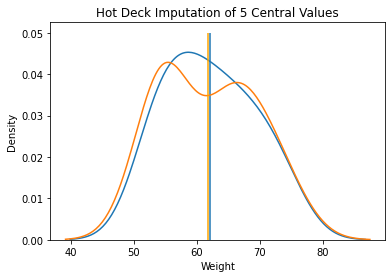

In [41]:
mhdhw = hw.copy()
mhdhw.Weight[4:7] = hw.Weight[3]
mhdhw.Weight[7:9] = hw.Weight[9]
mhdhw
plt.title("Hot Deck Imputation of 5 Central Values")
sns.kdeplot(hw.Weight)
plt.vlines(x=np.mean(hw.Weight), ymin=0, ymax=.05)
sns.kdeplot(mhdhw.Weight)
plt.vlines(x=np.mean(mhdhw.Weight), ymin=0, ymax=.05, color='orange')

In [44]:
from sklearn.neighbors import KNeighborsClassifier as KN
knn = KN(n_neighbors=3)
knn.fit(hw.Height,hw.Weight)

ValueError: Expected 2D array, got 1D array instead:
array=[1.47 1.5  1.52 1.55 1.57 1.6  1.63 1.65 1.68 1.7  1.73 1.75 1.78 1.8
 1.83].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Building a linear regression model

In [ ]:
bases=[]
omits=[]
means=[]
medians=[]
gibbss=[]
for i in range(50):
    #BASELINE WITH ALL DATA (Expecting Best possible)
    X_train, X_test, y_train, y_test = tts(hw.Height,hw.Weight, test_size=.2, random_state=i)
    X_train= np.array(X_train).reshape(-1, 1)
    y_train= np.array(y_train).reshape(-1, 1)
    X_test = np.array(X_test).reshape(-1, 1)
    clf = LinearRegression()
    base = clf.fit(X_train, y_train).score(X_test,y_test)
    #OMIT DATUM
    omit =clf.fit(X_train[1:], y_train[1:]).score(X_test,y_test)
    # impute with mean
    hw.Weight[0]=np.mean(hw.Weight)
    X_train, X_test, y_train, y_test = tts(hw.Height,hw.Weight, test_size=.2, random_state=i)
    X_train= np.array(X_train).reshape(-1, 1)
    y_train= np.array(y_train).reshape(-1, 1)
    X_test = np.array(X_test).reshape(-1, 1)
    clf = LinearRegression()
    mean = clf.fit(X_train, y_train).score(X_test,y_test)
    #median
    hw.Weight[0]= np.median(hw.Weight)
    X_train, X_test, y_train, y_test = tts(hw.Height,hw.Weight, test_size=.2, random_state=i)
    X_train= np.array(X_train).reshape(-1, 1)
    y_train= np.array(y_train).reshape(-1, 1)
    X_test = np.array(X_test).reshape(-1, 1)
    clf = LinearRegression()
    median = clf.fit(X_train, y_train).score(X_test,y_test)
    #Impute with GIBBS Estimate
    hw.Weight[0]= 52 #GIBBS estimate
    X_train, X_test, y_train, y_test = tts(hw.Height,hw.Weight, test_size=.2, random_state=i)
    X_train= np.array(X_train).reshape(-1, 1)
    y_train= np.array(y_train).reshape(-1, 1)
    X_test = np.array(X_test).reshape(-1, 1)
    clf = LinearRegression()
    gibbs = clf.fit(X_train, y_train).score(X_test,y_test)
    
    bases.append(max(0,base))
    omits.append(max(0,omit))
    means.append(max(0,mean))
    medians.append(max(0,median))
    gibbss.append(max(0,gibbs))
                   
    
results = pd.DataFrame()
results['base']=bases
results['omit']=omits
results['mean']=means
results['median']=medians
results['gibbs']=gibbss
    
results['gibbs_mean'] = [True if results.gibbs[x]>results['mean'][x] else False for x in range(len(results))]
results['gibbs_median'] = [True if results.gibbs[x]>results['median'][x] else False for x in range(len(results))]
results['gibbs_omit'] = [True if results.gibbs[x]>=results['omit'][x] else False for x in range(len(results))]
results['gibbs_mean_diff'] = [results.gibbs[x]-results['mean'][x] for x in range(len(results))]
results['as_good'] = [True if results.gibbs[x]-results.base[x]==0 else False for x in range(len(results))]


In [ ]:
min(results.gibbs_mean_diff), np.mean(results.gibbs_mean_diff), max(results.gibbs_mean_diff), np.mean(results)

Unexpectedly, omitting the variable performs better than the base case with all original variables.  However, we definitely see a far better accuracy for the model with the GIBBS estimate compared with either mean or median imputation.

Let's try the other extreme case $\rightarrow$ the heaviest weight.

In [ ]:
#Finding the best estimate of Weight[-1]

weight = [70.41,71.38,71.85,72.07,72.23,72.26]
bmi = [21.03,21.31,21.45,21.52,21.57,21.58]
iterations = [28001,58001,88001,118001,148001,178001]
plt.title("Bayesian BMI Estimate")
plt.ylabel("BMI")
plt.xlabel("Iterations")
plt.vlines(x=148001,ymin=min(bmi),ymax=max(bmi), color='red')
plt.hlines(y=bmi[4], xmin=min(iterations),xmax=148001, color='red')
plt.plot(iterations, bmi), 'weight estimated as: ' + str(weight[4])

In [ ]:
bases=[]
omits=[]
means=[]
medians=[]
gibbss=[]
for i in range(50):

    #OMIT DATUM
    omit =clf.fit(X_train[:-1], y_train[:-1]).score(X_test,y_test)
    # impute with mean
    hw.Weight[14]=np.mean(hw.Weight)
    X_train, X_test, y_train, y_test = tts(hw.Height,hw.Weight, test_size=.2, random_state=i)
    X_train= np.array(X_train).reshape(-1, 1)
    y_train= np.array(y_train).reshape(-1, 1)
    X_test = np.array(X_test).reshape(-1, 1)
    clf = LinearRegression()
    mean = clf.fit(X_train, y_train).score(X_test,y_test)
    #median
    hw.Weight[14]= np.median(hw.Weight)
    X_train, X_test, y_train, y_test = tts(hw.Height,hw.Weight, test_size=.2, random_state=i)
    X_train= np.array(X_train).reshape(-1, 1)
    y_train= np.array(y_train).reshape(-1, 1)
    X_test = np.array(X_test).reshape(-1, 1)
    clf = LinearRegression()
    median = clf.fit(X_train, y_train).score(X_test,y_test)
    #Impute with GIBBS Estimate
    hw.Weight[14]= 71.83 #GIBBS estimate
    X_train, X_test, y_train, y_test = tts(hw.Height,hw.Weight, test_size=.2, random_state=i)
    X_train= np.array(X_train).reshape(-1, 1)
    y_train= np.array(y_train).reshape(-1, 1)
    X_test = np.array(X_test).reshape(-1, 1)
    clf = LinearRegression()
    gibbs = clf.fit(X_train, y_train).score(X_test,y_test)
    
    bases.append(max(0,base))
    omits.append(max(0,omit))
    means.append(max(0,mean))
    medians.append(max(0,median))
    gibbss.append(max(0,gibbs))

    
results = pd.DataFrame()
results['base']=bases
results['omit']=omits
results['mean']=means
results['median']=medians
results['gibbs']=gibbss
    
results['gibbs_mean'] = [True if results.gibbs[x]>results['mean'][x] else False for x in range(len(results))]
#results['gibbs_median'] = [True if results.gibbs[x]>results['median'][x] else False for x in range(len(results))]
#results['gibbs_omit'] = [True if results.gibbs[x]>=results['omit'][x] else False for x in range(len(results))]
results['gibbs_mean_diff'] = [results.gibbs[x]-results['mean'][x] for x in range(len(results))]
results['as_good'] = [True if results.gibbs[x]-results.base[x]==0 else False for x in range(len(results))]
results.head()

In [ ]:
min(results.gibbs_mean_diff), np.mean(results.gibbs_mean_diff), max(results.gibbs_mean_diff), np.mean(results)

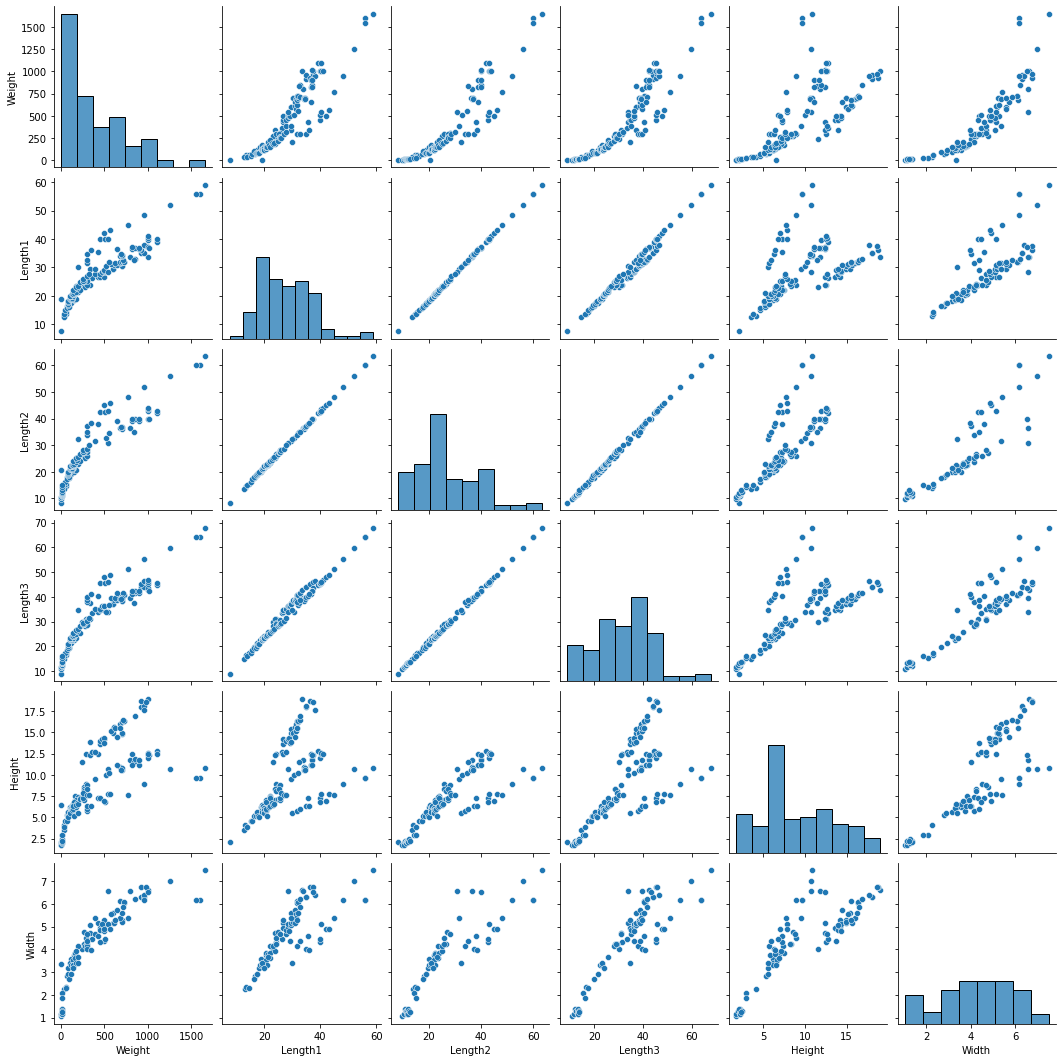

In [417]:
sns.pairplot(df)

# Results
Here we see that the GIBBS estimate outperforms all but the base case, which we should expect to be the best, given it is a complete data set with no estimates.

This was a simple toy example with a small dataset, with pretty small stakes.  Let's see what happens when we're looking at something a bit more complicated.



# Multivariate Mess MNAR
Here we test several datasets to compare the effectiveness of GIBBS sampling for data imputation compared with omitting the value, or substituting with either mean, median or mode.

In [264]:
df = pd.read_csv('Fish.csv')

In [265]:
#MNAR omission
np.random.seed(42) #for reproducibility
for x in df[df.Species == 'Smelt'].index:
    df.Length1[x] = 'NA'
for x in df[df.Species == 'Bream'].index:
    df.Length2[x] = 'NA'
for x in df[df.Species == 'Roach'].index:
    df.Length3[x] = 'NA'
for x in df[df.Species == 'Parkki'].index:
    df.Height[x] = 'NA'
for x in df[df.Species == 'Perch'].index:
    df.Width[x] = 'NA'
    
X,x = tts(df, test_size=.1, stratify=df.Species)
x.sort_values(by='Species')

gdf = df.copy()

L1fill = [8.797,9.5,9.5,9.8,10.2,10.4,10.8,10.8,10.9,11.1,11.2,11.5,12.7,16.6]
L2fill = [28.18,29.336,29.24,31.49,31.96,32.65,32.49,32.89,33.03,34.07,34.07,34.08,34.24,35.05,35.04,35.06,36.08,36.27,36.37,36.43,37.18,36.95,37.39,38.23,38.17,38.55,38.27,39.11,39.24,40.26,41.61,41.52,42.75,43.31,43.84]
L3fill = [15.61,19.56,20.7,21.5,21.9,22.3,22.45,22.8,23.93,24.03,24.01,24.58,24.72,25.67,25.71,25.84,27,47,27.95,29.04,34.07]
Hfill = [5.966,5.978,6.079,6.225,6.387,6.27,6.5,6.3,6.6,7,7.15]
Wfill = [2.3,2.69,2.787,2.95,2.79,2.95,2.99,3.13,3.13,3.19,3.16,3.16,3.3,3.3,3.3,3.43,3.41,3.345,3.423,3.397,3.315,3.4,3.55,3.44,3.36,3.55,3.78,3.55,3.67,3.63,3.69,3.85,4.123,3.9,3.9,3.92,4.008,4.08,4.141,4.818,4.95,5.5,5.28,2.26,5.3,5.26,5.68,5.35,5.75,5.74,5.78,6,5.6,6.262,6,6.26,6.143,6.154]

l1=[]
l2=[]
l3=[]
h=[]
w=[]
for i in range(len(gdf)):
    if gdf.Length1[i] != 'NA':
        l1.append(gdf.Length1[i])
        
    else:
        l1.append(L1fill[0])
        L1fill.pop(0)
    if gdf.Length2[i] != 'NA':
        l2.append(gdf.Length2[i])
    else:
        l2.append(L2fill[0])
        L2fill.pop(0)
    if gdf.Length3[i] != 'NA':
        l3.append(gdf.Length3[i])
    else:
        l3.append(L3fill[0])
        L3fill.pop(0)
    if gdf.Height[i] != 'NA':
        h.append(gdf.Height[i])
    else:
        h.append(Hfill[0])
        Hfill.pop(0)
    if gdf.Width[i] != 'NA':
        w.append(gdf.Width[i])
    else:
        w.append(Wfill[0])
        Wfill.pop(0)
gdf.Length1 = l1
gdf.Length2 = l2
gdf.Length3 = l3
gdf.Height = h
gdf.Width = w

/tmp/ipykernel_305223/1817151204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Length1[x] = 'NA'
/tmp/ipykernel_305223/1817151204.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Length2[x] = 'NA'
/tmp/ipykernel_305223/1817151204.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Length3[x] = 'NA'
/tmp/ipykernel_305223/1817151204.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [266]:
df=df.replace('NA',np.nan)

In [270]:
#FILL NAs with mean of column
meandf=df.drop('Species',axis=1).apply(lambda x: x.fillna(x.mean()),axis=0)
meandf['Species'] = df.Species
#TOTAL ABSOLUTE DIFFERENCE BETWEEN ORIGINAL DATASET AND MEAN IMPUTED ONE
 
abs(meandf.drop('Species',axis=1)- pd.read_csv("Fish.csv").drop('Species',axis=1)).values.sum()

691.2774907030996

In [268]:
abs(gdf.drop('Species',axis=1)- pd.read_csv("Fish.csv").drop('Species',axis=1)).values.sum()

228.51660000000004

In [299]:
from sklearn.metrics import r2_score
#PREP FOR LINEAR REGRESSION
for col in pd.get_dummies(data=df, drop_first=True).columns:
    if col not in gdf.columns:
        gdf[col]=pd.get_dummies(data=df, drop_first=True)[col]
    if col not in meandf.columns:
        meandf[col]=pd.get_dummies(data=df, drop_first=True)[col]

# Regression

In [318]:
from sklearn.metrics import mean_squared_error as MSE

In [321]:
#Mean Imputation regression
mX_train, mX_test, my_train, my_test = tts(meandf.drop(['Species','Weight'], axis=1), meandf['Weight'], test_size=.3, random_state=4)
clf = LinearRegression()
clf.fit(mX_train, my_train).score(mX_train,my_train)
MSE(clf.predict(mX_test),my_test)

8650.025470262439

In [322]:
gX_train, gX_test, gy_train, gy_test = tts(gdf.drop(['Species','Weight'], axis=1), meandf['Weight'], test_size=.3, random_state=4)
clf = LinearRegression()
clf.fit(gX_train, gy_train).score(gX_train,gy_train)
MSE(clf.predict(gX_test),gy_test)

8839.296990954334

In [327]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

mregr = OLS(my_test, add_constant(mX_test)).fit()
gregr = OLS(gy_test, add_constant(gX_test)).fit()
print(mregr.bic, gregr.bic)

580.9748585329593 594.1793854529626


In [294]:
#GIBBS estimate
X_train, X_test, y_train, y_test = tts(gdf.drop(['Species','Weight'],axis=1), df['Weight'], test_size=.2, random_state=42)
clf = LinearRegression()
clf.fit(X_train, y_train).score(X_test,y_test)

0.9639100130066743

In [333]:
bases=[]
means=[]
gibbss=[]
#clf=LinearRegression()
for size in [.15,.2,.25,.3]:
    for i in range(100):


        # impute with mean
        X_train, X_test, y_train, y_test = tts(meandf.drop(['Species', 'Weight'],axis=1),df.Weight, test_size=size, random_state=i)
        #X_train= np.array(X_train).reshape(-1, 1)
        #y_train= np.array(y_train).reshape(-1, 1)
        #X_test = np.array(X_test).reshape(-1, 1)
        mean = clf.fit(X_train, y_train).score(X_test,y_test)
        #Impute with GIBBS Estimate
        X_train, X_test, y_train, y_test = tts(gdf.drop(['Species','Weight'], axis=1),df.Weight, test_size=size, random_state=i)
        #X_train= np.array(X_train).reshape(-1, 1)
        #y_train= np.array(y_train).reshape(-1, 1)
        #X_test = np.array(X_test).reshape(-1, 1)
        
        gibbs = clf.fit(X_train, y_train).score(X_test,y_test)



        means.append(max(0,mean))

        gibbss.append(max(0,gibbs))

    
results = pd.DataFrame()
results['base']=bases
results['mean']=means
results['gibbs']=gibbss
    
results['gibbs_mean'] = [True if results.gibbs[x]>results['mean'][x] else False for x in range(len(results))]
#results['gibbs_median'] = [True if results.gibbs[x]>results['median'][x] else False for x in range(len(results))]
#results['gibbs_omit'] = [True if results.gibbs[x]>=results['omit'][x] else False for x in range(len(results))]
results['gibbs_mean_diff'] = [results.gibbs[x]-results['mean'][x] for x in range(len(results))]
results['as_good'] = [True if results.gibbs[x]-results.base[x]==0 else False for x in range(len(results))]
results.head()
np.mean(results)

/home/slim/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


base                    NaN
mean               0.930871
gibbs              0.876698
gibbs_mean         0.047500
gibbs_mean_diff   -0.054173
as_good            0.000000
dtype: float64

In [334]:

sum([1 if x==True else 0 for x in results.gibbs_mean])/len(results)

0.0475

In [335]:
results

,base,mean,gibbs,gibbs_mean,gibbs_mean_diff,as_good
0,NaN,0.940563,0.910577,False,-0.029987,False
1,NaN,0.919701,0.853687,False,-0.066014,False
2,NaN,0.933431,0.898918,False,-0.034513,False
3,NaN,0.952636,0.956714,True,0.004078,False
4,NaN,0.964149,0.969482,True,0.005333,False
...,...,...,...,...,...,...
395,NaN,0.933776,0.928280,False,-0.005496,False
396,NaN,0.935010,0.923659,False,-0.011351,False
397,NaN,0.952823,0.878800,False,-0.074023,False
398,NaN,0.897692,0.808950,False,-0.088742,False


In [347]:
# GOODNESS OF FIT
ggof = gdf[['Length1','Length2','Length3','Height','Width']]

def check_gof(obs, exp):
    return stats.chisquare(obs,exp)

for col in ggof.columns:
    obs = ggof[col]
    exp = pd.read_csv("Fish.csv")[col]
    check_gof(obs,exp)

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.0009121004284211726

In [350]:
stats.kstest(ggof['Length1'], pd.read_csv("Fish.csv")['Length1']) 

KstestResult(statistic=0.031446540880503145, pvalue=0.999998949765117)

In [351]:
stats.kstest(meandf['Length1'], pd.read_csv("Fish.csv")['Length1']) 

KstestResult(statistic=0.0880503144654088, pvalue=0.5700717164592637)

<AxesSubplot:title={'center':'KDE of Width from original data, GIBBS estimated data, and mean-imputed data'}, xlabel='Length1', ylabel='Density'>

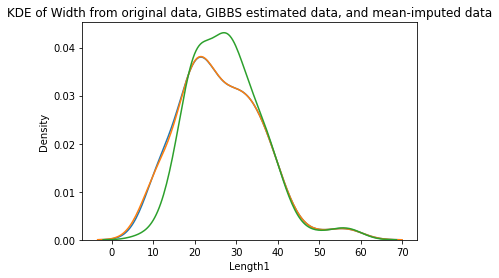

In [362]:
plt.title("KDE of "+col+" from original data, GIBBS estimated data, and mean-imputed data")
sns.kdeplot(pd.read_csv("Fish.csv")['Length1'])
sns.kdeplot(ggof['Length1'])
sns.kdeplot(meandf['Length1'])

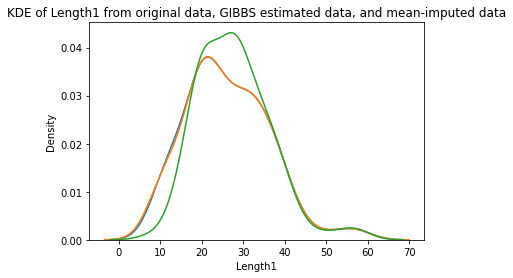

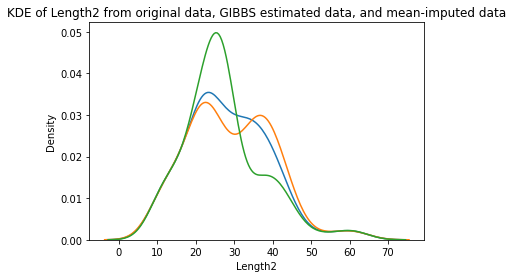

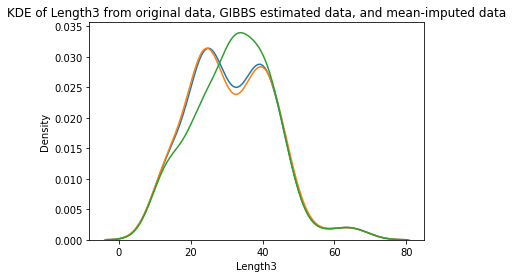

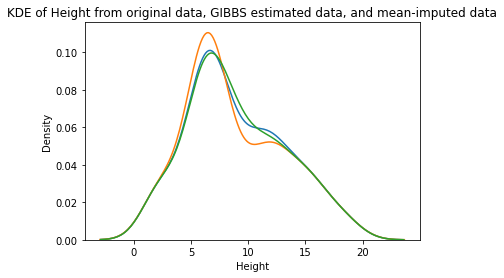

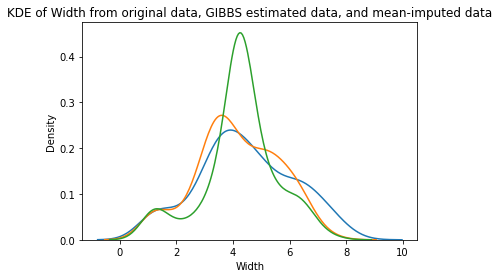

In [365]:
for col in ggof.columns:

    plt.title("KDE of "+col+" from original data, GIBBS estimated data, and mean-imputed data")
    sns.kdeplot(pd.read_csv("Fish.csv")[col])
    sns.kdeplot(ggof[col])
    sns.kdeplot(meandf[col])
    plt.show()

In [369]:
for col in ggof.columns:

    print('mean '+col+' '+str(stats.kstest(meandf[col], pd.read_csv("Fish.csv")[col])) )
    print('GIBBS '+col+' '+str(stats.kstest(ggof[col], pd.read_csv("Fish.csv")[col]) ))

mean Length1 KstestResult(statistic=0.0880503144654088, pvalue=0.5700717164592637)
GIBBS Length1 KstestResult(statistic=0.031446540880503145, pvalue=0.999998949765117)
mean Length2 KstestResult(statistic=0.20125786163522014, pvalue=0.003117663120952861)
GIBBS Length2 KstestResult(statistic=0.0880503144654088, pvalue=0.5700717164592637)
mean Length3 KstestResult(statistic=0.11949685534591195, pvalue=0.2066790213393747)
GIBBS Length3 KstestResult(statistic=0.018867924528301886, pvalue=0.9999999999999999)
mean Height KstestResult(statistic=0.03773584905660377, pvalue=0.9998784891367146)
GIBBS Height KstestResult(statistic=0.05660377358490566, pvalue=0.9617909391587456)
mean Width KstestResult(statistic=0.1949685534591195, pvalue=0.004652137912567925)
GIBBS Width KstestResult(statistic=0.1069182389937107, pvalue=0.32421486845206654)


In [370]:
#GOF variables only
bases=[]
means=[]
gibbss=[]
#clf=LinearRegression()
for size in [.15,.2,.25,.3]:
    for i in range(100):


        # impute with mean
        X_train, X_test, y_train, y_test = tts(meandf.drop(['Species', 'Weight', 'Length2','Width'],axis=1),df.Weight, test_size=size, random_state=i)
        #X_train= np.array(X_train).reshape(-1, 1)
        #y_train= np.array(y_train).reshape(-1, 1)
        #X_test = np.array(X_test).reshape(-1, 1)
        mean = clf.fit(X_train, y_train).score(X_test,y_test)
        #Impute with GIBBS Estimate
        X_train, X_test, y_train, y_test = tts(gdf.drop(['Species','Weight'], axis=1),df.Weight, test_size=size, random_state=i)
        #X_train= np.array(X_train).reshape(-1, 1)
        #y_train= np.array(y_train).reshape(-1, 1)
        #X_test = np.array(X_test).reshape(-1, 1)
        
        gibbs = clf.fit(X_train, y_train).score(X_test,y_test)



        means.append(max(0,mean))

        gibbss.append(max(0,gibbs))

    
results = pd.DataFrame()
results['base']=bases
results['mean']=means
results['gibbs']=gibbss
    
results['gibbs_mean'] = [True if results.gibbs[x]>results['mean'][x] else False for x in range(len(results))]
#results['gibbs_median'] = [True if results.gibbs[x]>results['median'][x] else False for x in range(len(results))]
#results['gibbs_omit'] = [True if results.gibbs[x]>=results['omit'][x] else False for x in range(len(results))]
results['gibbs_mean_diff'] = [results.gibbs[x]-results['mean'][x] for x in range(len(results))]
results['as_good'] = [True if results.gibbs[x]-results.base[x]==0 else False for x in range(len(results))]
results.head()
np.mean(results)

/home/slim/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


base                    NaN
mean               0.919992
gibbs              0.876698
gibbs_mean         0.327500
gibbs_mean_diff   -0.043294
as_good            0.000000
dtype: float64

In [372]:
meandf.drop(['Species', 'Weight', 'Length2','Width'],axis=1)

,Length1,Length3,Height,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.200000,30.0,11.5200,0,0,0,0,0,0
1,24.000000,31.2,12.4800,0,0,0,0,0,0
2,23.900000,31.1,12.3778,0,0,0,0,0,0
3,26.300000,33.5,12.7300,0,0,0,0,0,0
4,26.500000,34.0,12.4440,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
154,27.694483,13.4,2.0904,0,0,0,0,1,0
155,27.694483,13.5,2.4300,0,0,0,0,1,0
156,27.694483,13.8,2.2770,0,0,0,0,1,0
157,27.694483,15.2,2.8728,0,0,0,0,1,0


In [402]:
X_train, X_test, y_train, y_test = tts(meandf.drop(['Species', 'Weight', 'Length2','Width'],axis=1),df.Weight, test_size=size, random_state=i)
mregr = OLS(y_test, add_constant(X_test)).fit()
gregr = OLS(gy_test, add_constant(gX_test)).fit()
print(mregr.bic, gregr.bic)

594.3919789759493 594.1793854529626


In [403]:
print(mregr.aic, gregr.aic)


575.6799688668704 573.5961743329758


In [387]:
print(mregr.llf, gregr.llf)

-277.8399844334352 -275.7980871664879


In [396]:
print(np.sqrt(mregr.mse_model), np.sqrt(gregr.mse_model))

842.6918898707708 789.398136064716


In [391]:
print(mregr.rsquared, gregr.rsquared)

0.9552310064937476 0.9577189669698023


In [392]:
print(mregr.rsquared_adj, gregr.rsquared_adj)

0.9446278238212141 0.9462916607454246


In [393]:
print(mregr.ssr, gregr.ssr)

299536.02183925884 275105.76694218855


In [404]:
#print(mregr.pvalues, gregr.pvalues)
mregr.pvalues

const                0.000002
Length1              0.718809
Length3              0.052179
Height               0.394001
Species_Parkki       0.306947
Species_Perch        0.970262
Species_Pike         0.026580
Species_Roach        0.020283
Species_Smelt        0.726136
Species_Whitefish    0.449010
dtype: float64

In [415]:
gregr.pvalues

const                4.284621e-08
Length1              1.673932e-01
Length2              4.923992e-01
Length3              7.897237e-02
Height               6.954923e-01
Width                6.244121e-01
Species_Parkki       2.968551e-02
Species_Perch        2.737889e-02
Species_Pike         8.234824e-01
Species_Roach        4.687430e-02
Species_Smelt        1.061745e-04
Species_Whitefish             NaN
dtype: float64

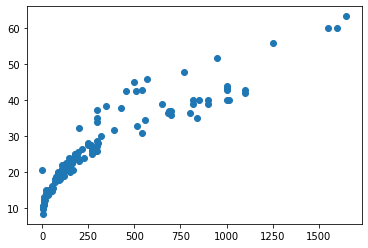

In [413]:
plt.scatter(df.Weight, df.Length2)

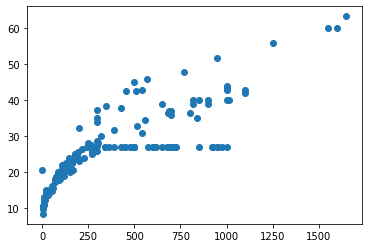

In [414]:
plt.scatter(df.Weight, meandf.Length2)